In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import max_norm
import numpy
import pandas as pd
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


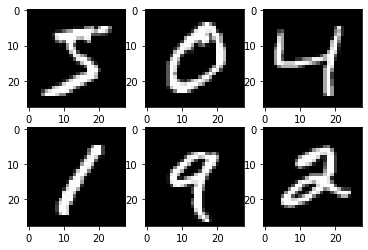

In [2]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int('23'+str(i+1)))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train/255
x_test = x_test/255
print(f"x_train shape : {x_train.shape}")
print(f"Training samples : {x_train.shape[0]}")
print(f"Testing samples : {x_test.shape[0]}")

x_train shape : (60000, 28, 28, 1)
Training samples : 60000
Testing samples : 10000


In [4]:

#define a CNN model
def create_model():
    num_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()


In [5]:
model.fit(x_train, y_train,batch_size=30, epochs=2,validation_data=(x_test, y_test))
!mkdir -p data
model.save('data/dataset') 

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 252s 4ms/step - loss: 0.1545 - accuracy: 0.9533 - val_loss: 0.0455 - val_accuracy: 0.9853
Epoch 2/2
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0358 - val_accuracy: 0.9890


In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03582068315156794
Test accuracy: 0.9890000224113464
